<a href="https://colab.research.google.com/github/ishumann/Computer_Vision/blob/main/PPE_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
display.clear_output()

AttributeError: 'function' object has no attribute 'clear_output'

In [ ]:
!nvidia-smi

In [5]:
HOME = os.getcwd()

In [6]:
print(HOME)

/content


In [7]:
# !pip install ultralytics==8.0.0

In [8]:
# Git clone method (for development and edit)
# %cd {HOME}
# !pip install -e ultralytics

# from IPython import display
# display.clear_output() # not working
# import ultralytics
# ultralytics.checks()




In [9]:
import ultralytics

In [10]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [11]:
!mkdir {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists


In [12]:
!pwd

/content


In [13]:
%cd {HOME}/datasets

/content/datasets


In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JGzjMACOzuJVRPfqSs3X")
project = rf.workspace("objet-detect-yolov5").project("eep_detection-u9bbd")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to EEP_Detection-1 in yolov5pytorch:: 100%|██████████| 6482/6482 [00:01<00:00, 5477.79it/s]


In [17]:
%cd {HOME}

/content


In [18]:
%cd {dataset.location}

/content/EEP_Detection-1


In [21]:
%cd {HOME}

/content


In [25]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/EEP_Detection-1/data1.yaml epochs=10 imgsz=640

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:341: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(attempt_download(weight), map_location='

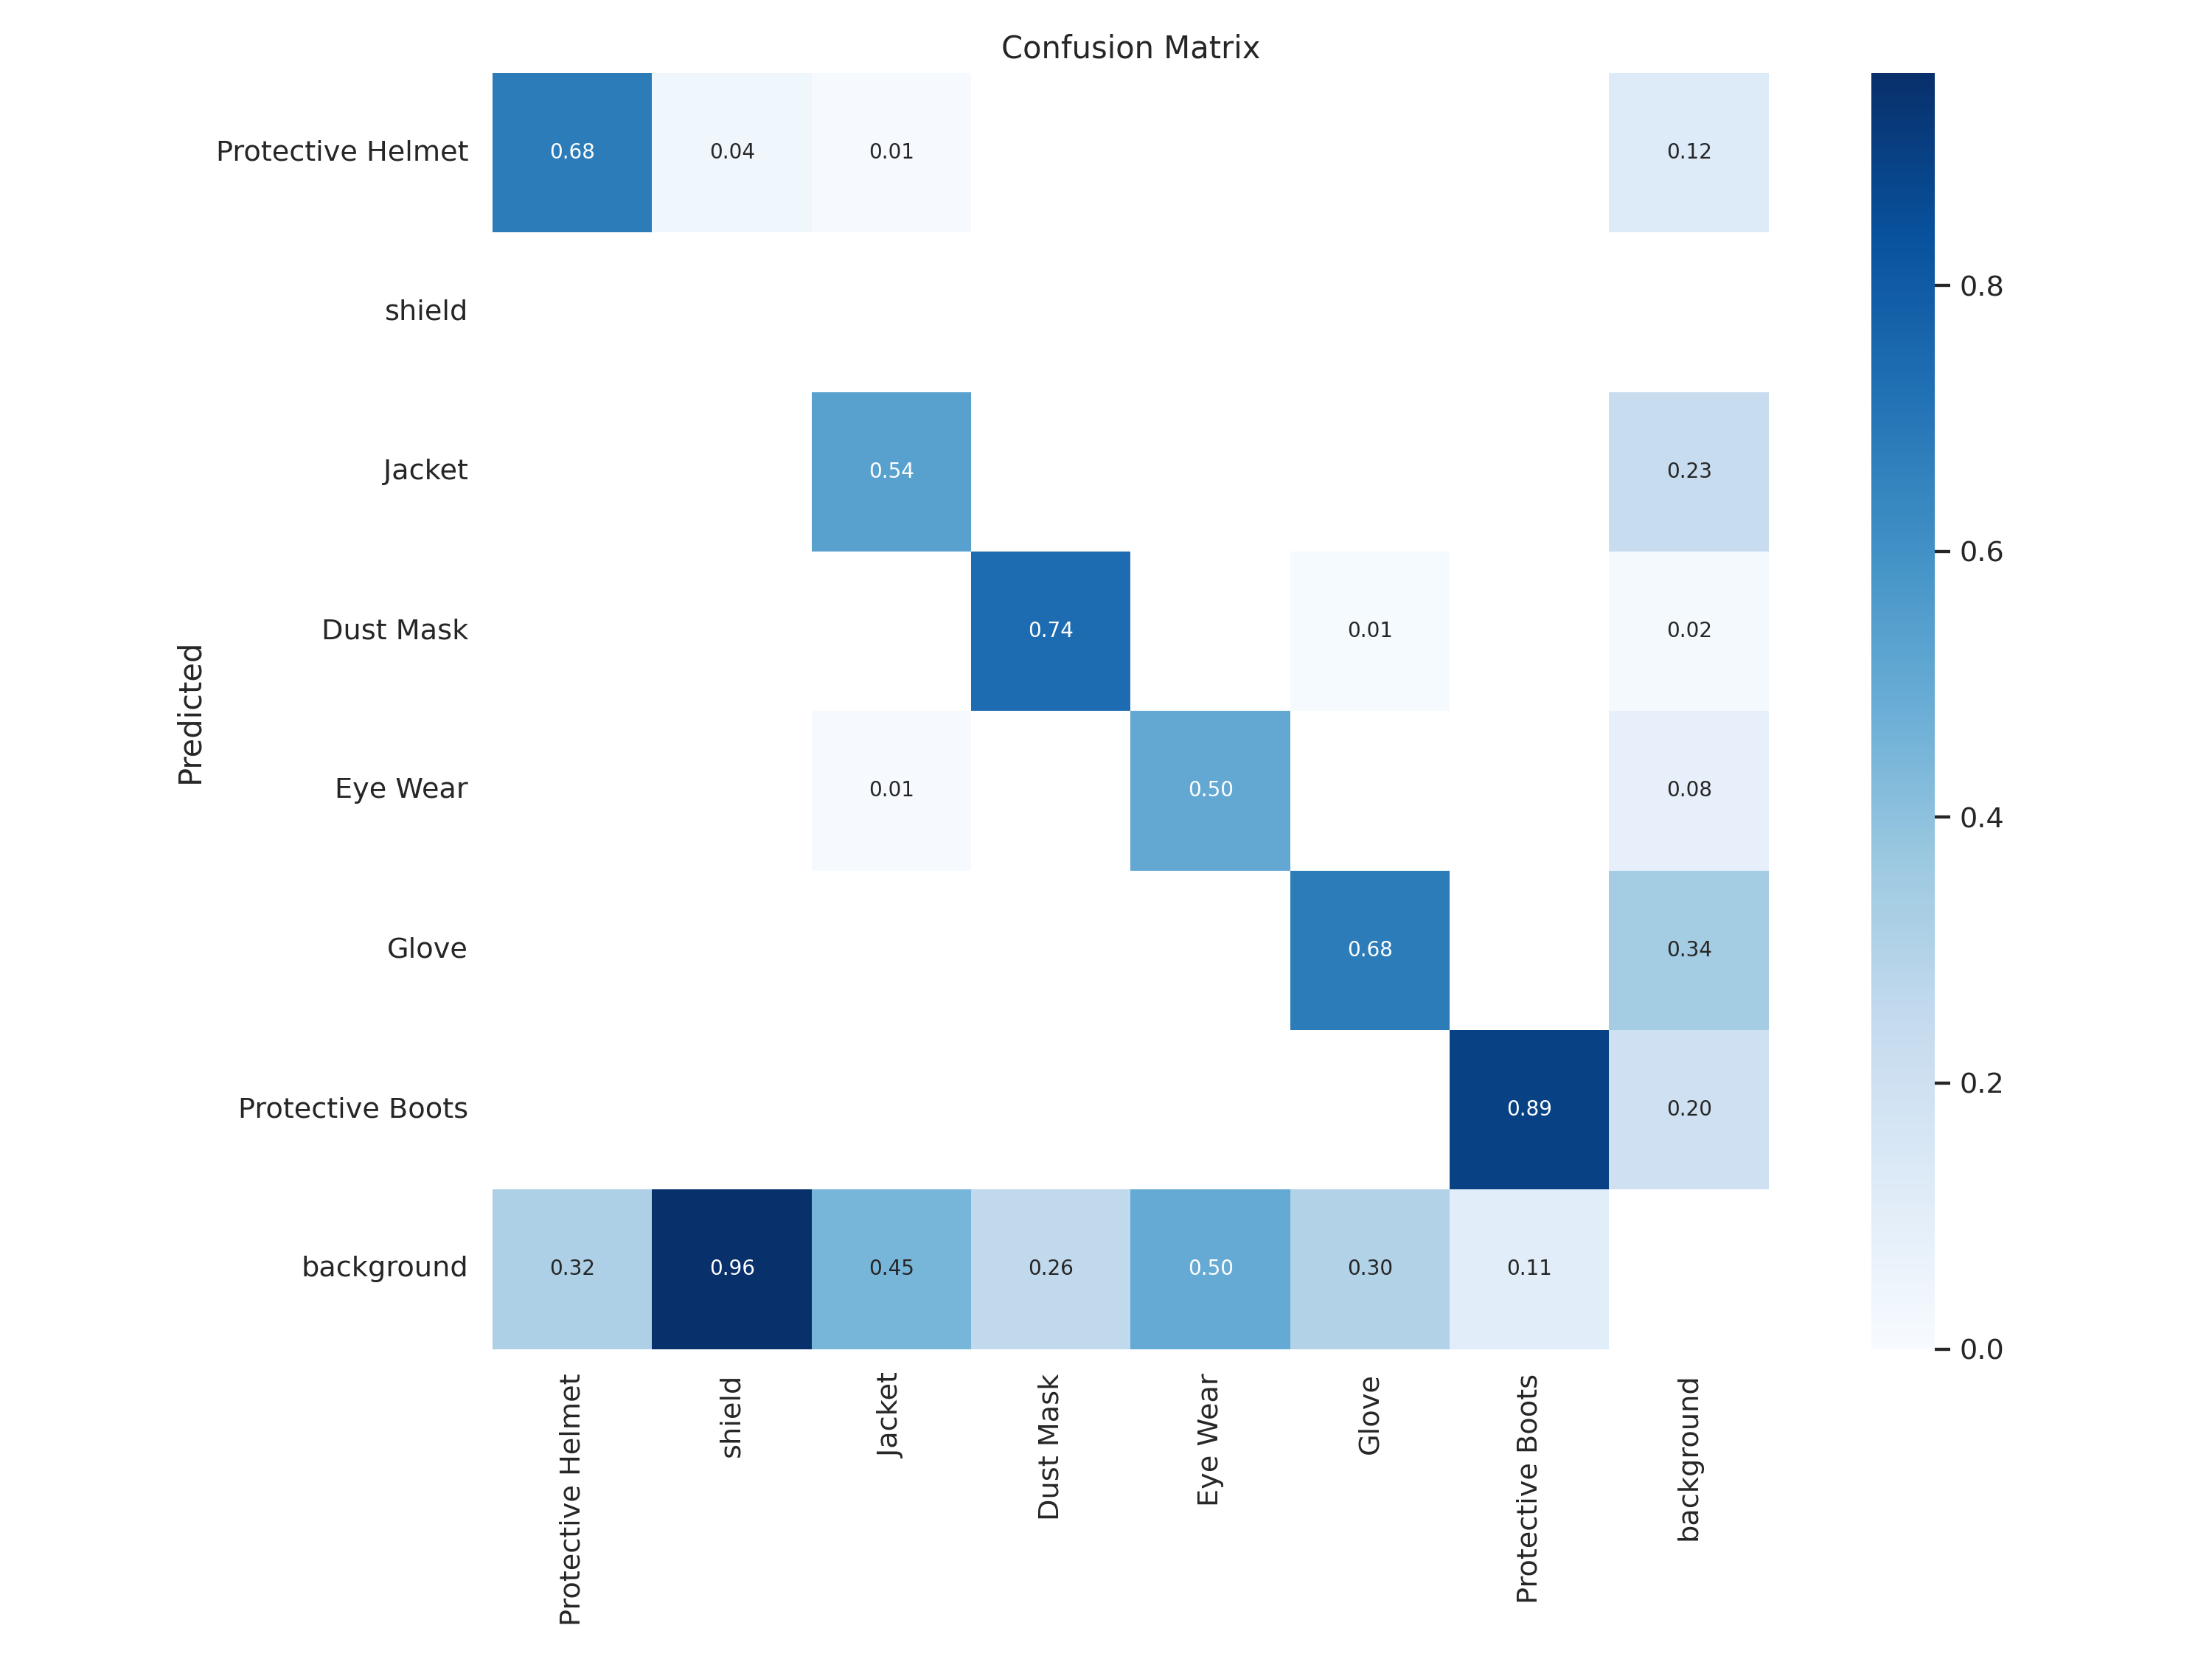

In [29]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=900)

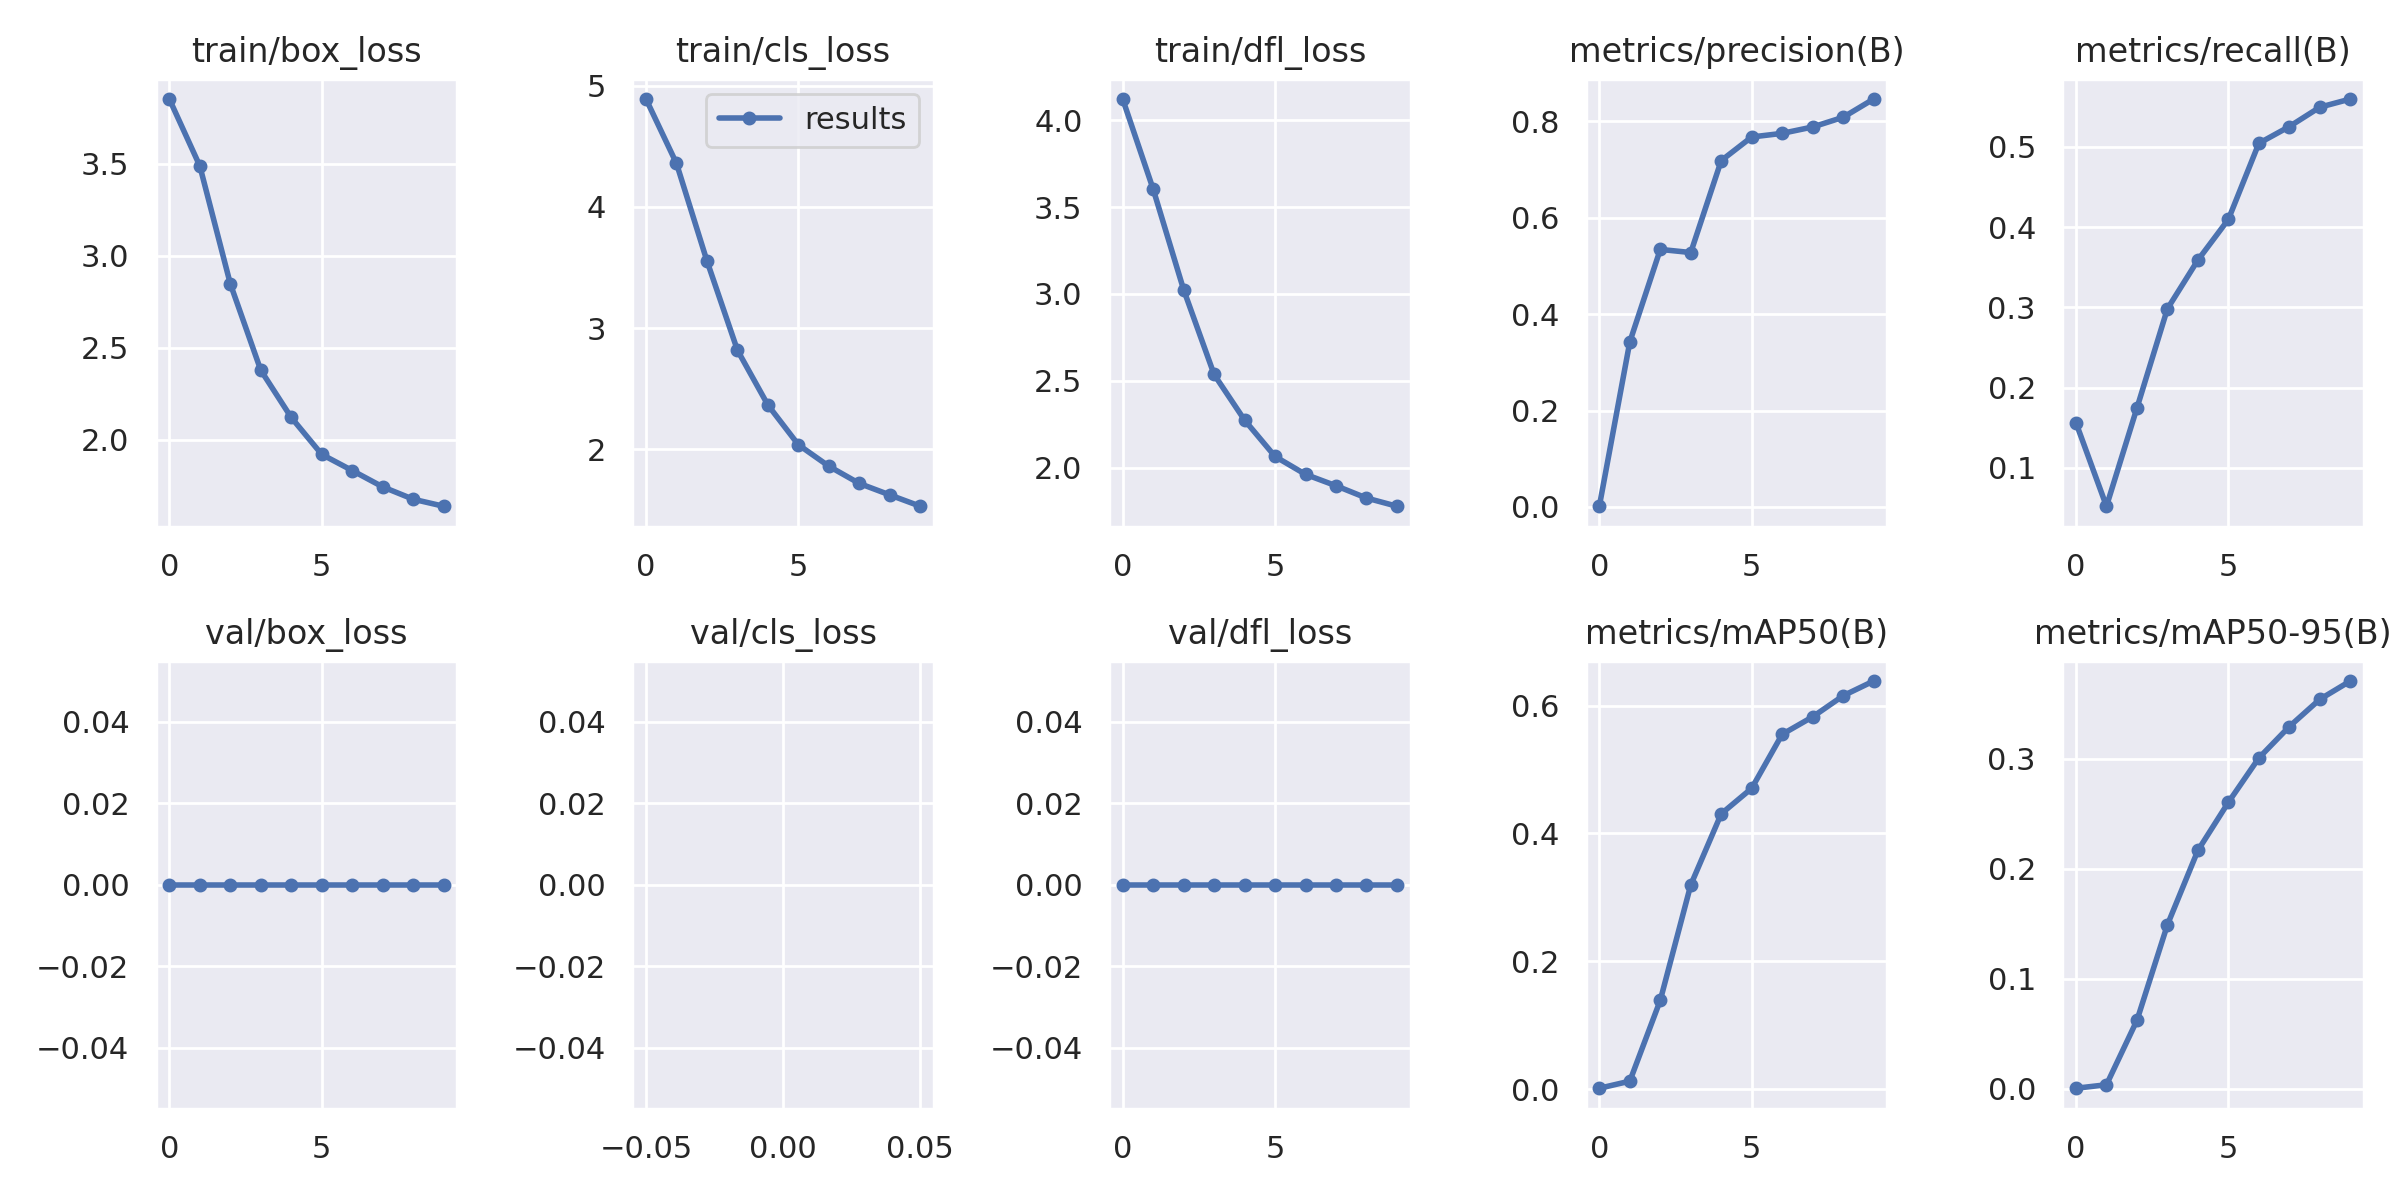

In [30]:
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=900)

In [32]:
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.png', width=900)

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train2/val_batch0_pred.png'

In [33]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/EEP_Detection-1/data1.yaml epochs=10 imgsz=640

2025-02-06 10:15:43.492021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738836943.513432   38956 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738836943.519722   38956 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-06 10:15:43.541903: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Ultralytics YOLOv8.0.0 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
/usr/local/lib/python3.11/dist-

In [35]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source="/content/EEP_Detection-1/test/images"

2025-02-06 10:23:11.754682: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738837391.774824   40893 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738837391.781001   40893 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-06 10:23:11.802160: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Ultralytics YOLOv8.0.0 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
/usr/local/lib/python3.11/dist-

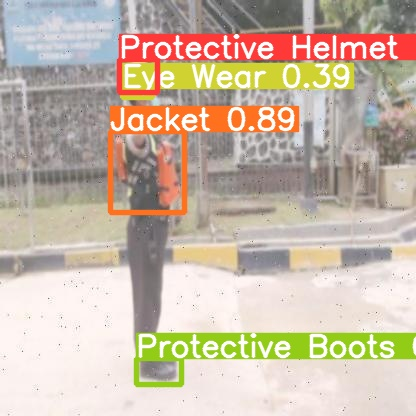

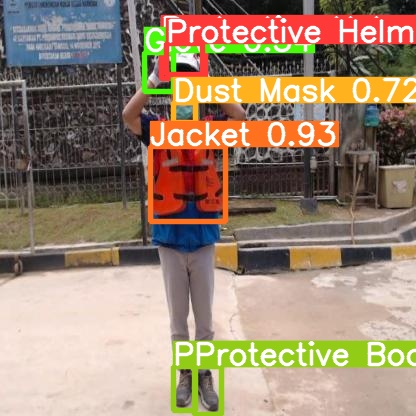

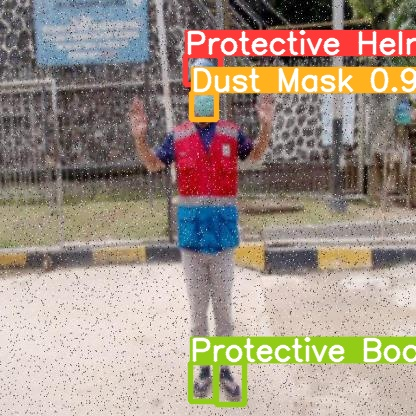

In [43]:
import glob
from IPython.display import Image, display


for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[3:6]:
    display(Image(filename=image_path, width=300))


In [44]:
!gdown "https://drive.google.com/uc?id=1256pNK0nQnEDT6FRLQAraTRkOY7BSprq&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1256pNK0nQnEDT6FRLQAraTRkOY7BSprq&confirm=t
To: /content/demo4.mp4
100% 16.9M/16.9M [00:00<00:00, 22.6MB/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/demo4.mp4'

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict10/demo3.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
!gdown "https://drive.google.com/uc?id=1256pNK0nQnEDT6FRLQAraTRkOY7BSprq&confirm=t"

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/demo4.mp4'

In [ ]:
!rm "/content/result_compressed.mp4"
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict10/demo3.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)